# Solving Ordinary Differential Equations (ODEs)

- [DifferentialEquations.jl docs](https://diffeq.sciml.ai/dev/index.html)

## Radioactive decay

How to define your model, state variables, initial (and/or boundary) conditions, and parameters.

As a simple example, the concentration of a decaying nuclear isotope could be described as an exponential decay:

$$
\frac{d}{dt}C(t) = - \lambda C(t)
$$

**State variable(s)**
- $C(t)$: The concentration of a decaying nuclear isotope.

**Parameter(s)**
- $\lambda$: The rate constant of decay. The half-life $t_{\frac{1}{2}} = \frac{ln2}{\lambda}$

### Standard operating procedures

- Define a model function representing the right-hand-side (RHS) of the sysstem.
  - Out-of-place form: `f(u, p, t)` where `u` is the state variable(s), `p` is the parameter(s), and `t` is the independent variable (usually time). The output is the right hand side (RHS) of the differential equation system.
  - In-place form: `f!(du, u, p, t)`, where the output is saved to `du`. The rest is the same as the out of place form. The in-place form has potential performance benefits since it allocates less arrays than the out-of-place form.
- Initial conditions (`u0`) for the state variable(s).
- (Optional) parameter(s) `p`.
- Define a problem (e.g. `ODEProblem`) using the modeling function (`f`), initial conditions (`u0`), simulation time span (`tspan == (tstart, tend)`), and parameter(s) `p`.
- Solve the problem by calling `solve(prob)`.

In [1]:
using DifferentialEquations
using Plots

# The Exponential decay ODE model, out-of-place form
expdecay(u, p, t) = p * u

p = -1.0 # Parameter
u0 = 1.0 # Initial condition
tspan = (0.0, 2.0) # Simulation start and end time points
prob = ODEProblem(expdecay, u0, tspan, p) # Define the problem
sol = solve(prob) # Solve the problem

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 8-element Vector{Float64}:
 0.0
 0.10001999200479662
 0.34208427873632274
 0.6553980290285384
 1.0312652902321524
 1.4709406498424789
 1.9659577002710475
 2.0
u: 8-element Vector{Float64}:
 1.0
 0.9048193287657775
 0.7102883564034526
 0.5192354320104405
 0.35655575232768816
 0.2297097760377979
 0.14002246806154703
 0.13533600284000216

### Visualization

`plot(sol)` directly visualizes the time series of the state variable(s) thanks to built-in plot recipe.

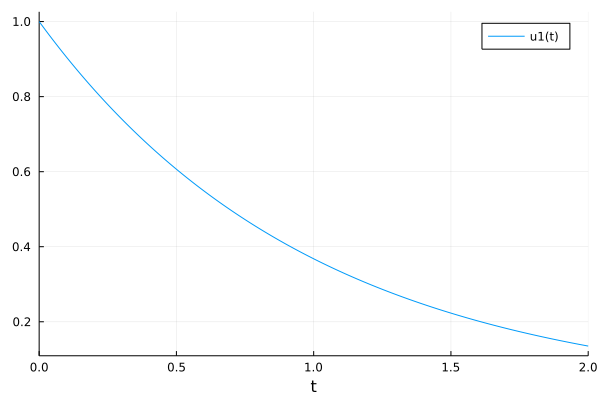

In [2]:
using Plots
plot(sol) # Visualize the solution

### Solution handling

Docs: https://diffeq.sciml.ai/stable/basics/solution/

`sol(t)`: solution at time `t` with interpolations.

In [3]:
sol(1.0)  # 

0.3678796381978157

`sol.t`: time points of the solution. Notice *t=1* may not in one of the time points.

In [4]:
sol.t

8-element Vector{Float64}:
 0.0
 0.10001999200479662
 0.34208427873632274
 0.6553980290285384
 1.0312652902321524
 1.4709406498424789
 1.9659577002710475
 2.0

`sol.u`: The solution at time points `sol.t`

In [5]:
sol.u

8-element Vector{Float64}:
 1.0
 0.9048193287657775
 0.7102883564034526
 0.5192354320104405
 0.35655575232768816
 0.2297097760377979
 0.14002246806154703
 0.13533600284000216

## The SIR model

A more complicated example is the [SIR model](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model) describing infectious disease spreading. There are more state variables and parameters.

$$
\begin{align}
\frac{d}{dt}S(t) &= - \beta S(t)I(t)  \\
\frac{d}{dt}I(t) &= \beta S(t)I(t)  - \gamma I(t)  \\
\frac{d}{dt}R(t) &= \gamma I(t)
\end{align}
$$

**State variable(s)**

- $S(t)$ : the fraction of susceptible people
- $I(t)$ : the fraction of infectious people
- $R(t)$ : the fraction of recovered (or removed) people

**Parameter(s)**

- $\beta$ : the rate of infection when susceptible and infectious people meet
- $\gamma$ : the rate of recovery of infectious people

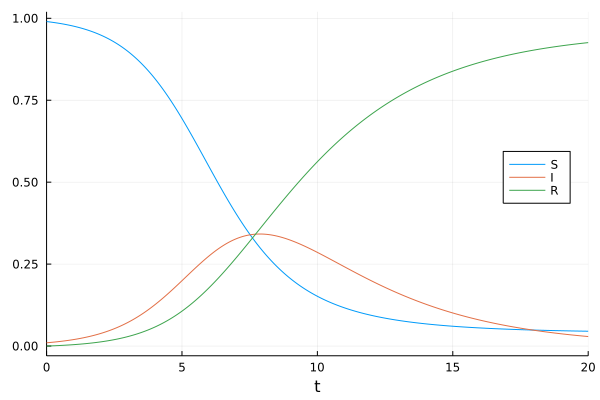

In [6]:
using DifferentialEquations
using Plots

# SIR model, in-place form
function sir!(du, u, p ,t)
	s, i, r = u
	β, γ = p
	v1 = β * s * i
	v2 = γ * i
    du[1] = -v1
    du[2] = v1 - v2
    du[3] = v2
	return nothing
end

# Parameters of the SIR model
p = (β = 1.0, γ = 0.3)
u0 = [0.99, 0.01, 0.00]  # s, i, r
tspan = (0.0, 20.0)

# Define a problem
prob = ODEProblem(sir!, u0, tspan, p)

# Solve the problem
sol = solve(prob)

# Visualize the solution
plot(sol, label=["S" "I" "R"], legend=:right)

### Solution handling

`sol[i, j]`: `i`th component at timestep `j`

In [7]:
sol[2]

3-element Vector{Float64}:
 0.9890894703413342
 0.010634484617786016
 0.0002760450408797849

In [8]:
sol[1, 2]

0.9890894703413342

`sol[i, :]`: the timeseries for the `i`th component.

In [9]:
sol[1, :]

17-element Vector{Float64}:
 0.99
 0.9890894703413342
 0.985833159331863
 0.9795270525087807
 0.9689082161766913
 0.9490552303913907
 0.9118629477834834
 0.83988711099089
 0.7075842208271159
 0.5081460371757575
 0.31213222200646223
 0.18215683750565148
 0.10427205838453524
 0.07386737657579155
 0.05545029045782678
 0.047334991613510125
 0.04522885458990323

`sol(t,idxs=1)`: the 1st element in time point(s) `t` with interpolation. `t` can be a scalar (single point) or an vector-like sequence. (multiple time points)

In [10]:
sol(10, idxs=2)

0.28576194586859216

In [11]:
sol(0.0:0.1:20.0, idxs=2)

t: 0.0:0.1:20.0
u: 201-element Vector{Float64}:
 0.01
 0.010713819530291442
 0.011477376329634038
 0.012293955863322832
 0.013167034902663069
 0.014100286700885258
 0.015097588761311277
 0.01616303136064275
 0.01730091874845445
 0.0185157717800971
 0.019812342119400837
 0.021195608353497077
 0.022670772696080404
 ⋮
 0.03842222949435219
 0.03746172764830135
 0.03652459823604228
 0.0356103082327585
 0.03471833422623712
 0.03384816241686911
 0.03299928861764899
 0.032171218254175085
 0.031363466364649484
 0.030575557599877796
 0.02980702622326952
 0.02905741611083769

## Lorenz system

The Lorenz system is a system of ordinary differential equations having chaotic solutions for certain parameter values and initial conditions. ([Wikipedia](https://en.wikipedia.org/wiki/Lorenz_system))

$$
\begin{align}
  \frac{dx}{dt} &=& \sigma(y-x) \\
  \frac{dy}{dt} &=& x(\rho - z) -y \\
  \frac{dz}{dt} &=& xy - \beta z
\end{align}
$$

In this example, we will use [LabelledArrays.jl](https://github.com/SciML/LabelledArrays.jl) to get DSL-like syntax.

In [12]:
using LabelledArrays
using DifferentialEquations
using Plots

function lorenz!(du,u,p,t)
    du.x = p.σ*(u.y-u.x)
    du.y = u.x*(p.ρ-u.z) - u.y
    du.z = u.x*u.y - p.β*u.z
end

u0 = LVector(x=1.0, y=0.0, z=0.0)
p = LVector(σ=10.0, ρ=28.0, β=8/3)
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1289-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624087100077666
   0.009058076582749423
   0.016956470605311864
   0.027689959227781235
   0.04185635103821218
   0.060240410627700816
   0.0836854113984534
   0.11336499269451543
   0.14862181409827
   0.18703978025370946
   ⋮
  99.3397852599881
  99.40421692882006
  99.4725041528708
  99.5412045549744
  99.6085310903818
  99.67192934036703
  99.72954041869967
  99.78291962638104
  99.84176034083528
  99.90666445162192
  99.98069072555015
 100.0
u: 1289-element Vector{LArray{Float64, 1, Vector{Float64}, (:x, :y, :z)}}:
 3-element LArray{Float64, 1, Vector{Float64}, (:x, :y, :z)}:
 :x => 1.0
 :y => 0.0
 :z => 0.0
 3-element LArray{Float64, 1, Vector{Float64}, (:x, :y, :z)}:
 :x => 0.9996434557625105
 :y => 0.0009988049817849058
 :z => 1.781434788799189e-8


### Visualization

Plotting x-y-z time-series.

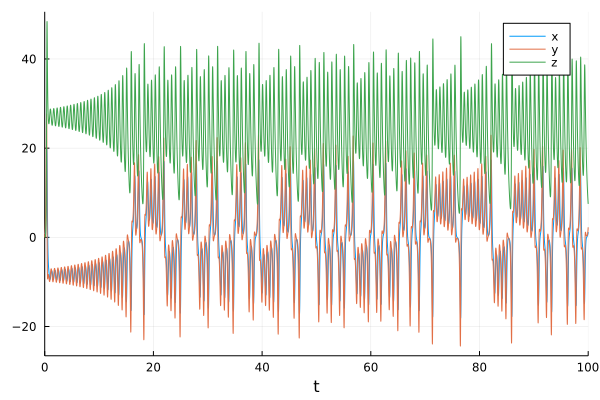

In [13]:
plot(sol)

`vars=(1, 2, 3)` makes a phase plot with 1st, 2nd, and the 3rd state variable. With `LabelledArrays`, you can use symbols instead of index numbers.

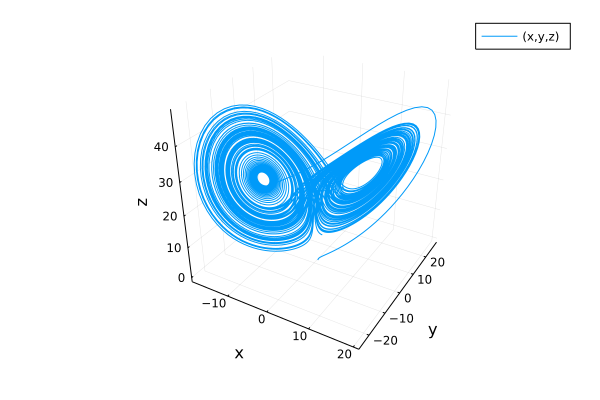

In [14]:
plot(sol, vars=(:x, :y, :z))

The plot recipe is using the interpolation to smooth the plot. You can turn off `denseplot` to see the difference.

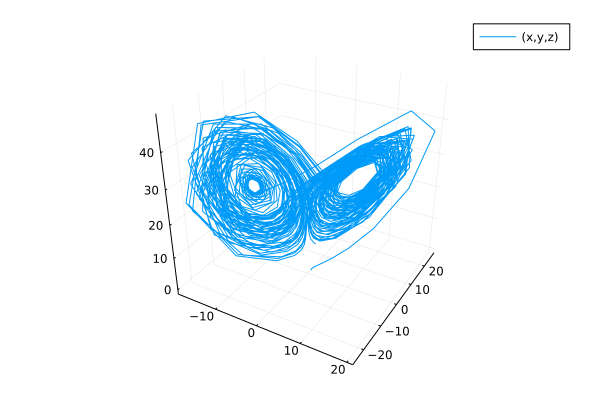

In [15]:
plot(sol, vars=(1, 2, 3), denseplot=false)

The zeroth variable in `vars` is the independent variable (usually time).

The below command plots the time series of the second state variable (`y`).

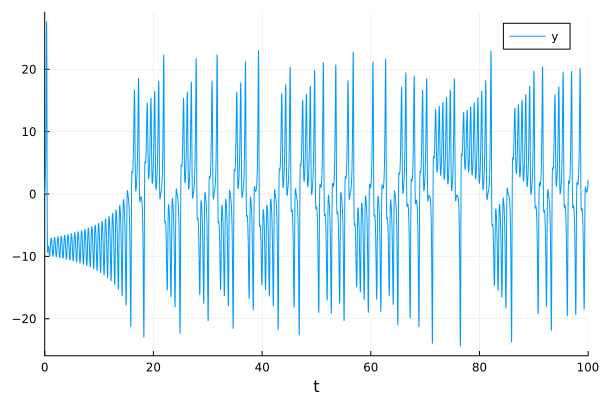

In [16]:
plot(sol, vars=(0, 2))

## Non-autonomous ODEs

Some terms in the right-hadn-side (RHS) is time-dependent. For example, in this pendulum model

$$
\begin{aligned}
\dot{\theta} &= \omega(t) \\
\dot{\omega} &= -1.5\frac{g}{l}sin(\theta(t)) + \frac{3}{ml^2}M(t)
\end{aligned}
$$

- $\theta$: pendulum angle
- $\omega$: angular rate
- M: time-dependent external torgue
- $l$: pendulum length
- $g$: gravitional acceleration



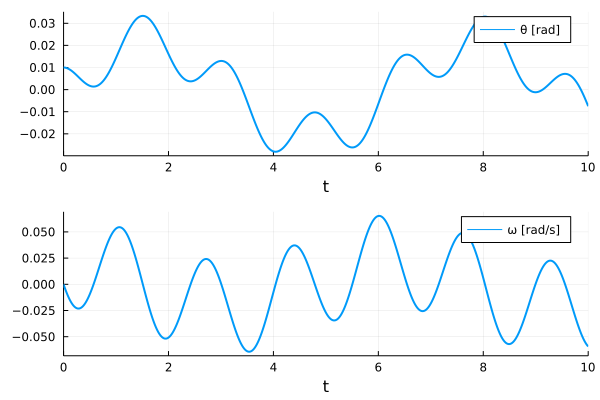

In [17]:
using DifferentialEquations
using Plots

l = 1.0                             # length [m]
m = 1.0                             # mass [kg]
g = 9.81                            # gravitational acceleration [m/s²]

function pendulum!(du, u, p, t)
    du[1] = u[2]                    # θ'(t) = ω(t)
    du[2] = -3g/(2l)*sin(u[1]) + 3/(m*l^2)*p(t) # ω'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)
end

θ₀ = 0.01                           # initial angular deflection [rad]
ω₀ = 0.0                            # initial angular velocity [rad/s]
u₀ = [θ₀, ω₀]                       # initial state vector
tspan = (0.0,10.0)                  # time interval

M = t->0.1sin(t)                    # external torque [Nm] as the parameter fro the pendulum model

prob = ODEProblem(pendulum!, u₀, tspan, M)
sol = solve(prob)

plot(sol, linewidth=2, xaxis="t", label=["θ [rad]" "ω [rad/s]"], layout=(2,1))

## Linear ODE system

In this example, a matrix describes an ODE system.  $\dot{u} = Au$

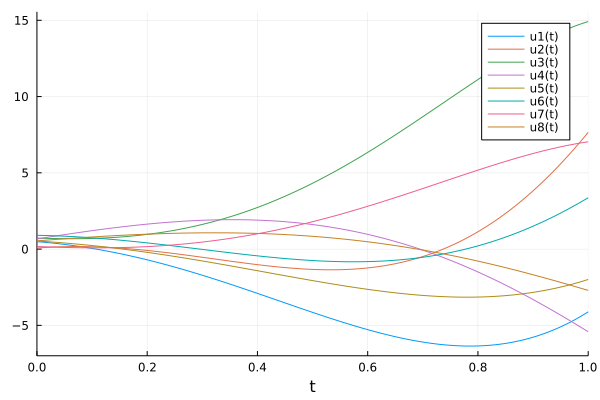

In [18]:
using DifferentialEquations
using Plots

A  = [1. 0  0 -5
      4 -2  4 -3
     -4  0  0  1
      5 -2  2  3]

u0 = rand(4, 2)

tspan = (0.0, 1.0)
f(u, p, t) = A*u
prob = ODEProblem(f, u0, tspan)

sol = solve(prob)
plot(sol)